In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
with fits.open('ADAP_Subgiants/DistantClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas().reset_index(drop=True)
df['Cluster'].unique()

array(['NGC0752 ', 'NGC1039 ', 'Trump02 ', 'NGC0884 ', 'NGC0869 ',
       'Stock2  ', 'NGC0188 ', 'NGC2682 ', 'NGC7092 ', 'NGC6793 ',
       'NGC2232 ', 'NGC2422 ', 'NGC2437 ', 'NGC2423 ', 'NGC2360 ',
       'NGC2323 ', 'NGC2548 ', 'NGC2168 ', 'NGC2158 ', 'NGC6475 ',
       'NGC6405 ', 'NGC6774 ', 'IC4725  ', 'IC4756  ', 'NGC6633 ',
       'IC4665  ', 'NGC1901 ', 'NGC2516 ', 'NGC2547 ', 'Trump10 ',
       'NGC3532 ', 'NGC3228 ', 'Coll140 ', 'NGC2447 ', 'NGC6025 ',
       'IC4651  ', 'NGC6281 '], dtype=object)

In [4]:
with fits.open('ADAP_Subgiants/NearbyClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas().reset_index(drop=True)
df['Cluster'].unique()

array(['Hyades  ', 'Pleiades', 'alphaPer', 'Praesepe', 'ComaBer ',
       'Blanco1 ', 'IC2602  ', 'IC2391  ', 'NGC2451 '], dtype=object)

In [5]:
df_cluster = df[(df['Cluster'] == 'alphaPer')]

df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)
asassn = df_cluster[df_cluster['asassn_name'].str.contains("ASASSN")]
df_cluster = df_cluster.drop(asassn.index).sort_values(by=['gmag']).reset_index(drop=True)

In [6]:
g = df_cluster['gmag']
bprp = df_cluster['bpmag'] - df_cluster['rpmag']
cluster = str(df_cluster['Cluster'][0])

min_g = min(g)
max_g = max(g)

In [7]:
df_cluster

,dr2_source_id,dr3_source_id,Cluster,SimbadName_cluster,e_plx_cluster,plx_cluster,skymapper_id,sdss_id,twomass_id,allwise_id,...,cc_flags,ext_flg,ph_qual_2,moon_lev,asassn_name,Mean Vmag_ASASSN,amplitude_ASASSN,period_ASASSN,Type_ASASSN,class_probability_ASASSN
0,441416161501150848,441416161501150848,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,,J032803.09+490346.1,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
1,442501619995081088,442501619995081088,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03190764+5005420,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
2,442550823139950080,442550823139950080,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03183775+5013200,J031837.78+501319.5,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
3,242889338420659968,242889338420659968,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,1237670962171281620,03292627+4656162,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
4,248960223149560960,248960223149560960,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03313314+4751447,J033133.15+475144.4,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,442644449127465600,442644449127465600,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03232035+5057242,J032320.39+505723.9,...,0000,0,AAUU,0000,,NaN,NaN,NaN,,NaN
672,249689332505535872,249689332505535872,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03354735+4917430,J033547.38+491742.8,...,0000,0,AAUU,0000,,NaN,NaN,NaN,,NaN
673,436481377216828800,436481377216828800,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03172753+4936529,J031727.58+493652.7,...,0000,0,AACC,0000,,NaN,NaN,NaN,,NaN
674,441820330803357568,441820330803357568,alphaPer,alpha Per cluster,0.005,5.718,-9223372036854775808,-9223372036854775808,03291874+5022108,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN


Text(0.5, 1.0, 'alphaPer')

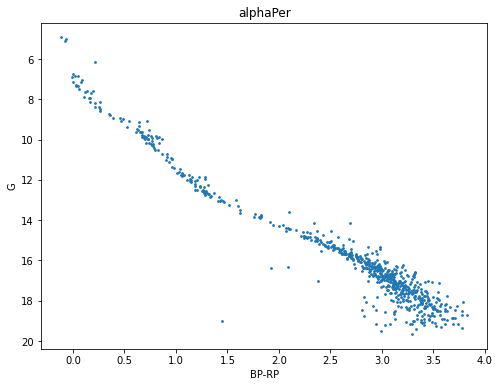

In [8]:
plt.scatter(bprp, g, s=3)
plt.gca().invert_yaxis()
plt.xlabel('BP-RP')
plt.ylabel('G')
plt.title(cluster)

Text(0.5, 1.0, 'alphaPer')

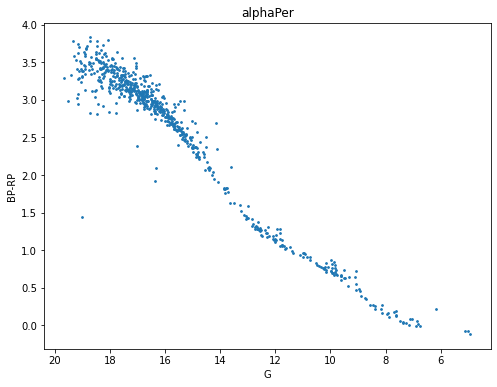

In [9]:
plt.scatter(g, bprp, s=3)
plt.gca().invert_xaxis()
plt.xlabel('G')
plt.ylabel('BP-RP')
plt.title(cluster)

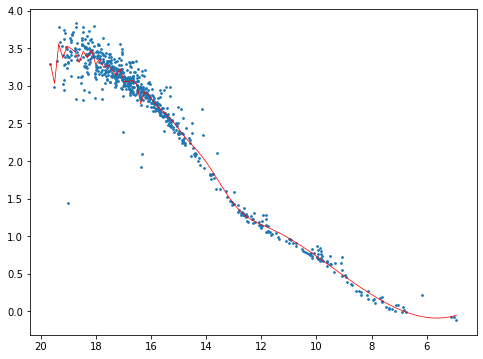

In [10]:
spl = UnivariateSpline(g, bprp)
xs = np.linspace(min_g, max_g, 100)
spl.set_smoothing_factor(15)
plt.gca().invert_xaxis()
plt.scatter(g, bprp, s=3)
plt.plot(xs, spl(xs), 'r-', lw=0.75, label='Univariate spline')
plt.show()

In [11]:
def analyze_cluster(name, spline_factor, lower_factor, mid_factor, upper_factor):
    
#     plt.rcParams["figure.figsize"] = (8,6)
    
    df_cluster = df[(df['Cluster'] == name)]
    df_cluster.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)
    asassn = df_cluster[df_cluster['asassn_name'].str.contains("ASASSN")]
    df_cluster = df_cluster.drop(asassn.index).sort_values(by=['gmag']).reset_index(drop=True)
    
    g = df_cluster['gmag']
    bprp = df_cluster['bpmag'] - df_cluster['rpmag']
    cluster = str(df_cluster['Cluster'][0]).rstrip()
    min_g = min(g)
    max_g = max(g)

    predict = UnivariateSpline(g, bprp)
    predict.set_smoothing_factor(spline_factor)
    x_lin_reg = np.linspace(min_g, max_g, 100)
    y_lin_reg = predict(x_lin_reg)
    
    diff = []
    sigma = []
    
    for i in range(len(g)):
        predicted = predict(g[i])    
        if g[i] < 13:
            unc = 0.002*lower_factor
        elif 13 <= g[i] < 18:
            unc = 0.010*mid_factor
        else:
            unc = 0.200*upper_factor
        diff.append(np.abs(bprp[i] - predicted))
        sigma.append(np.sqrt(2)*unc)
    
    # Extract the outliers
    x_2sigma = [] # g outside of the 2 sigma value
    y_2sigma = [] # corresponding bp-rp values
    x_1_5sigma = []
    y_1_5sigma = []
    x_1sigma = []
    y_1sigma = []
    x_good = []
    y_good = []
    
    for i in range(len(diff)):
        if diff[i] >= 2*sigma[i]:
            x_2sigma.append(g[i])
            y_2sigma.append(bprp[i])
        elif diff[i] >= 1.5*sigma[i]:
            x_1_5sigma.append(g[i])
            y_1_5sigma.append(bprp[i])
        elif diff[i] >= sigma[i]:
            x_1sigma.append(g[i])
            y_1sigma.append(bprp[i])
        else:
            x_good.append(g[i])
            y_good.append(bprp[i])
    
    # plot the good values alongside the rejected values (with different colors for sigma value) and the fitted line
    plt.scatter(x_good, y_good, s=3, label = 'Good points')
    plt.scatter(x_2sigma, y_2sigma, s=3, label = '2 sigma rejection')
    plt.scatter(x_1_5sigma, y_1_5sigma, s=3,label = '1.5 sigma rejection')
    plt.scatter(x_1sigma, y_1sigma, s=3, label = '1 sigma rejection')
    plt.plot(x_lin_reg, y_lin_reg, 'r-', lw=0.75, label='Univariate spline')

    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    plt.savefig('Figures/'+cluster+'_rejection.jpg')
    plt.close()
    
    # dropping all data outside the desired sigma level
    df_copy = df_cluster.copy()

    # delete the outlier stars in the copied dataframe
    for i in x_2sigma:
        df_copy.drop(df_copy.index[df_copy['gmag'] == i], inplace = True)
#     for i in x_1_5sigma:
#         df_copy.drop(df_copy.index[df_copy['gmag'] == i], inplace = True)
#     for i in x_1sigma:
#         df_copy.drop(df_copy.index[df_copy['gmag'] == i], inplace = True)

    df_copy = df_copy.reset_index(drop=True)
    df_copy.to_csv('Good Points CSVs/'+cluster+'_courtney_goodpts.csv')
    g_good = df_copy['gmag']
    bprp_good = df_copy['bpmag'] - df_copy['rpmag']
    
    # plotting points that passed our rejection
    plt.scatter(g_good, bprp_good, s=3, label = 'Not rejected at 2 sigma')
    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    plt.close()
    
    # making side-by-side plots of original data vs non-rejected data
    plt.rcParams["figure.figsize"] = (14,6)
    
    plt.subplot(1,2,1)
    plt.scatter(g, bprp, s=3, label = 'Original')
    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.scatter(g_good, bprp_good, s=3, label = 'Not rejected at 2 sigma')
    plt.gca().invert_xaxis()
    plt.xlabel('G')
    plt.ylabel('BP-RP')
    plt.title(cluster)
    plt.legend()
    
    plt.savefig('Figures/'+cluster+'_sidebyside.jpg')
    
    return df_copy

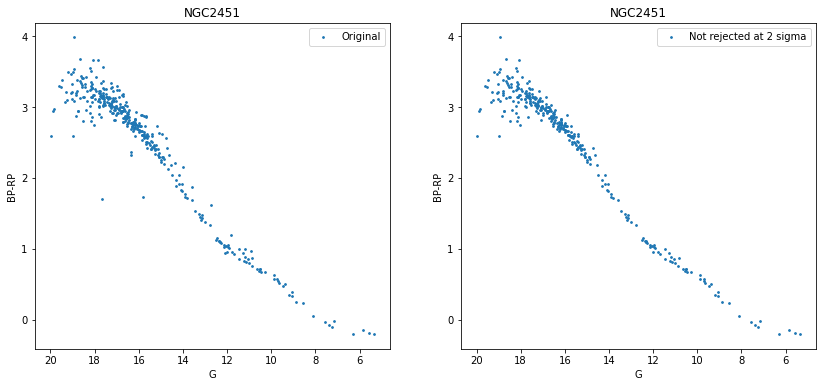

In [12]:
df_final = analyze_cluster('NGC2451 ', 5, 15, 5, 5)

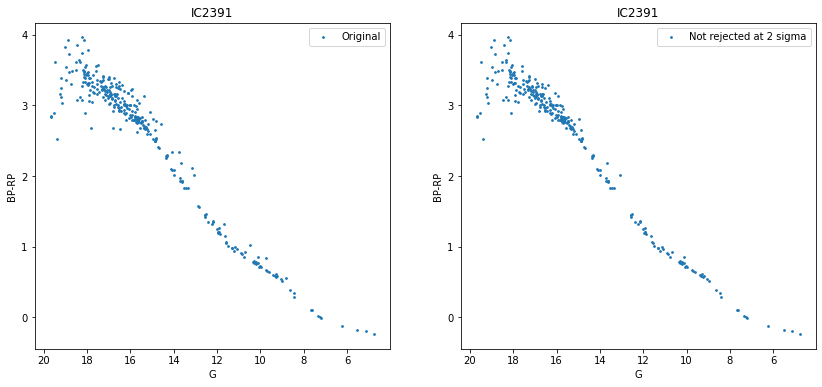

In [13]:
df_final = analyze_cluster('IC2391  ', 5, 15, 7, 3)

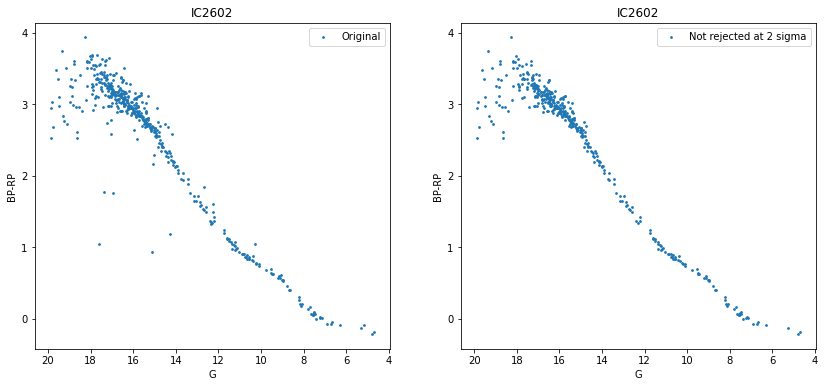

In [14]:
df_final = analyze_cluster('IC2602  ', 15, 15, 8, 5)

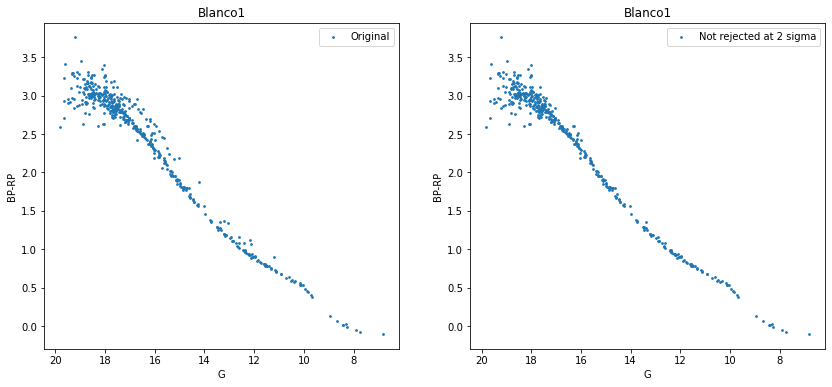

In [15]:
df_final = analyze_cluster('Blanco1 ', 5, 10, 5, 2)

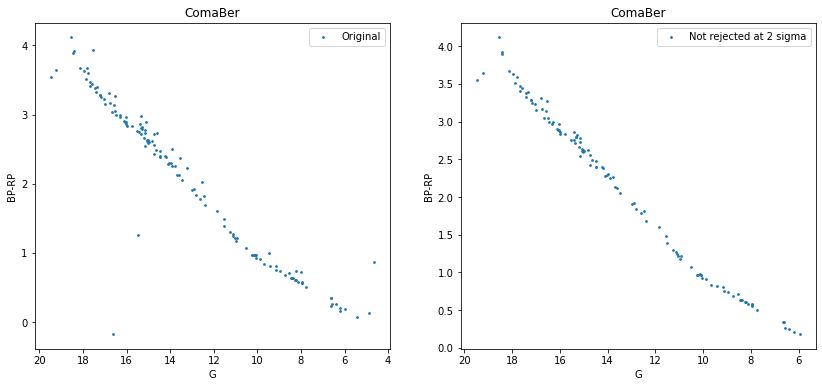

In [16]:
df_final = analyze_cluster('ComaBer ', 20, 20, 7, 1)

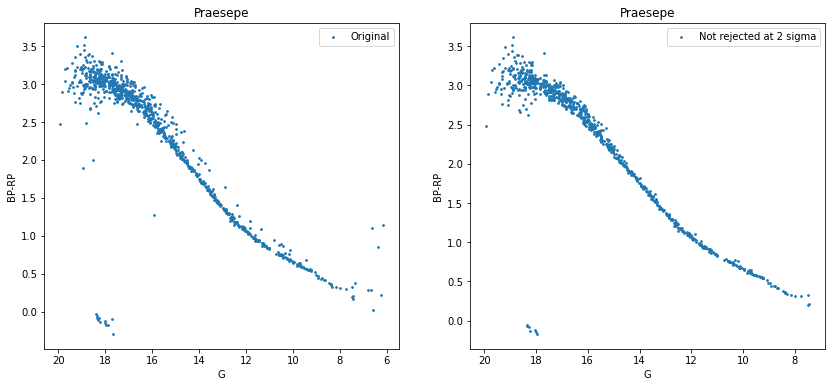

In [17]:
df_final = analyze_cluster('Praesepe', 30, 15, 5, 1)

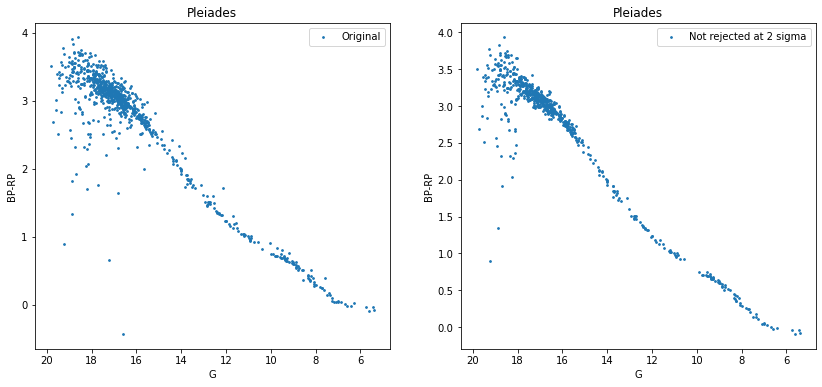

In [18]:
df_final = analyze_cluster('Pleiades', 35, 10, 5, 1)

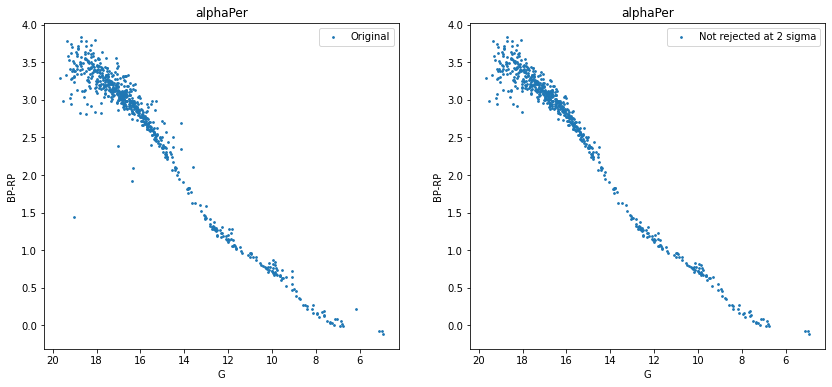

In [19]:
df_final = analyze_cluster('alphaPer', 15, 20, 7, 1)

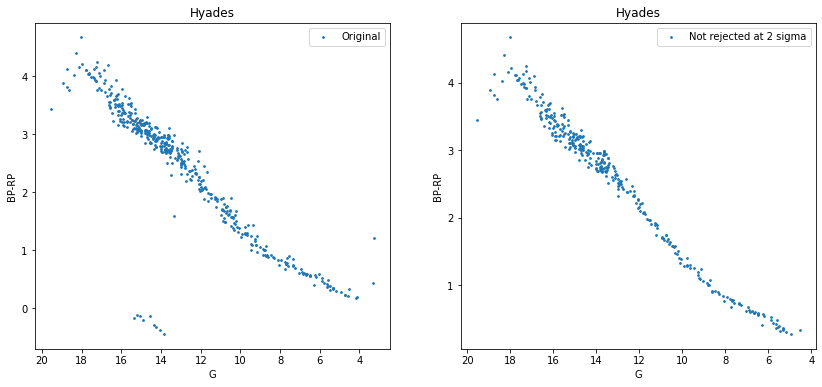

In [20]:
df_final = analyze_cluster('Hyades  ', 50, 20, 10, 5)

In [21]:
# the next few cells are just experimentation with overlaying MIST isochrones models - not finished

In [22]:
# import wget
# wget.download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
#          'read_mist_models.py')

In [23]:
import read_mist_models

iso = read_mist_models.ISO('MIST_iso_6266f5489e169.iso')

print('version: ', iso.version)
print( 'abundances: ', iso.abun)
print ('rotation: ', iso.rot)
print ('ages: ', [round(x,2) for x in iso.ages])
print ('number of ages: ', iso.num_ages)
print ('available columns: ', iso.hdr_list)

Reading in: MIST_iso_6266f5489e169.iso
version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'log_L', 'log_LH', 'log_LHe', 'log_Teff', 'log_R', 'log_g', 'surface_h1', '

In [24]:
age_ind = iso.age_index(np.log10(52000000)) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']

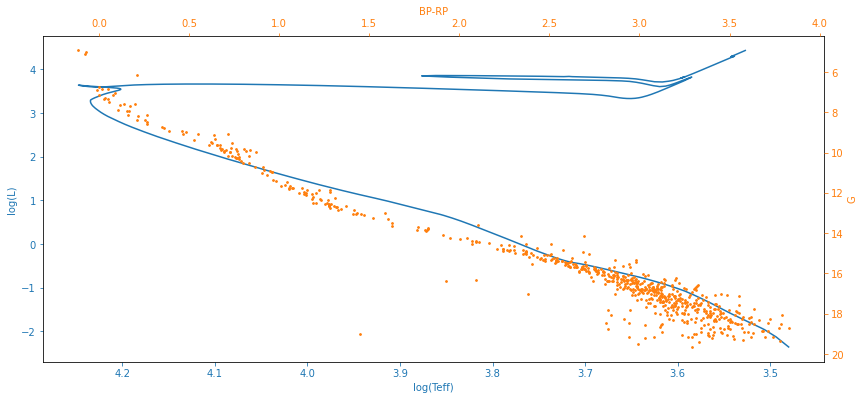

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.plot(logTeff, logL, color="C0")
ax.invert_xaxis()
ax.set_xlabel('log(Teff)', color="C0")
ax.set_ylabel('log(L)', color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
# ax.axis([5.2, 3.3, -4, 5])

ax2.scatter(bprp, g, s=3, color="C1")
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('BP-RP', color="C1") 
ax2.set_ylabel('G', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")

plt.show()